In [53]:
import pandas as pd
data = pd.read_csv('https://www.dropbox.com/s/sgyhxd859iw4xx0/prepared_sentences.csv?dl=1')
data.head()

,Unnamed: 0,doi,title,label,text,pub_year,pub_month,n_authors,n_references,n_sections,n_sentences,n_citation_sentence,reference_seq,section_seq,paragraph_seq,sentence_seq,citation_characer_seq,n_citations_in_sentence,sentence_character_seq,labels
0,1,10.1016/j.joi.2006.05.001,The influence of missing publications on the H...,"Bar-Ilan, 2006; Egghe, in press; Glänzel, 2006...","Recently the Hirsch index, in short: h-index, ...",2007,24085,1,13,7,74,22,1,1,1,1,109,4,1,"Bar-Ilan, 2006; Egghe, in press; Glänzel, 2006..."
1,2,10.1016/j.joi.2006.05.001,The influence of missing publications on the H...,Hirsch (2005),"This index, introduced by <CITATION> is calcul...",2007,24085,1,13,7,74,22,10,1,1,2,196,1,170,Hirsch (2005)
2,3,10.1016/j.joi.2006.05.001,The influence of missing publications on the H...,"Braun et al., 2005","Clearly, this definition can also be applied t...",2007,24085,1,13,7,74,22,2,1,1,5,653,3,525,"Braun et al., 2005||Egghe & Rousseau, 2006||Ro..."
3,4,10.1016/j.joi.2006.05.001,The influence of missing publications on the H...,"Bar-Ilan, 2006","Yet, it is also possible to collect citations ...",2007,24085,1,13,7,74,22,1,1,2,7,973,1,894,"Bar-Ilan, 2006"
4,5,10.1016/j.joi.2006.05.001,The influence of missing publications on the H...,"Rousseau, 2005",Expressed in a conglomerate framework this mea...,2007,24085,1,13,7,74,22,12,1,2,8,1160,1,1078,"Rousseau, 2005"


First, lets just make sure that we can get the word2vec model to work. Here, I am using the gensim implementation of word2vec, and I am following the example provided on their website at the following link,

https://radimrehurek.com/gensim/models/word2vec.html

In [54]:
# Load some basic text to use with word2vec. Common_texts has a simple text set that is useful for 
# testing. 
from gensim.test.utils import common_texts, get_tmpfile
# Load the actual function
from gensim.models import Word2Vec

print(common_texts)

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


In [55]:
# Using the gensim functions, load the path to the tmpfile
path = get_tmpfile("word2vec.model")

# Create the word2vec model, using the common texts library
model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)

# Train the model with 
model.train([["hello", "world"]], total_examples=1, epochs=1)
(0, 2)

vector = model.wv['computer']  # numpy vector of a word

print(vector)

[-1.1489480e-03  4.6315109e-03 -1.2491714e-03  3.1914932e-03
 -3.9946549e-03  2.8592069e-03 -2.4089201e-03  1.6210233e-03
  3.8524044e-03  5.7751627e-04 -2.2796197e-03 -3.9831321e-03
  4.5976015e-03 -2.1081872e-03  3.3956424e-03  2.5681325e-05
 -3.7307497e-03 -4.2543071e-03 -4.4249659e-03  4.2128242e-03
  4.5555532e-03  8.0007710e-04 -3.9744959e-03  4.9724225e-03
  2.5508124e-03 -4.0595321e-04  2.6521916e-03 -1.5699866e-03
 -1.7158827e-03 -3.3637073e-03 -2.9873680e-03  2.0031317e-04
  3.8014823e-03  4.9986877e-03 -4.2100502e-03 -4.0316009e-03
 -1.0168720e-03  2.9728594e-03  1.6256475e-03  3.1714817e-03
 -2.5440832e-03 -3.4327798e-03 -3.9537209e-03  2.5396782e-03
  1.6764089e-03 -4.2403364e-03  7.6707022e-04 -4.9221292e-03
 -4.4140830e-03  2.8244916e-03  1.3735527e-03  3.0899441e-03
  4.1663033e-04  4.9184300e-03 -1.7166643e-03  8.9128356e-04
  3.8822315e-04 -8.4111042e-04 -3.4197553e-03  1.3200253e-03
  1.1575234e-03 -3.3262321e-03  2.4013519e-03 -3.2004828e-03
  4.1664005e-03  2.92502

So now that we know that something is working, I'll move on to completing the tutorial from the following url,

http://ai.intelligentonlinetools.com/ml/k-means-clustering-example-word2vec/

The author defines their own sentences for use, which I will copy directly for now. 

In [56]:
sentences = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['this', 'is', 'the', 'new', 'post'],
                        ['this', 'is', 'about', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'last', 'post']]

model = Word2Vec(sentences, min_count=1)

Following the example, we can query the dictionary of the model

In [57]:
print(list(model.wv.vocab))

['this', 'is', 'the', 'good', 'machine', 'learning', 'book', 'another', 'one', 'more', 'new', 'post', 'about', 'and', 'last']


We can also query the model similarity between any two words, as we do below. 

In [58]:
print(model.wv.similarity('this', 'book'))

-0.085407786


/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Now, I will repeat this process, but with a sample of my own data. I will need to do some basic pre-processing on the sentences in my dataframe and tokenize the words. 

First, lets make sure that we can process a single line,

In [59]:
import gensim.utils as gs_utils
line = data["text"][1]
print(line)
gs_utils.simple_preprocess(line)

This index, introduced by <CITATION> is calculated as follows.


['this',
 'index',
 'introduced',
 'by',
 'citation',
 'is',
 'calculated',
 'as',
 'follows']

In [97]:
sentences = []
for line in data["text"][1:500]:
    sentences.append(gs_utils.simple_preprocess(line))
    
print(len(sentences))
print(sentences[1])

499
['clearly', 'this', 'definition', 'can', 'also', 'be', 'applied', 'to', 'some', 'other', 'source', 'item', 'pairs', 'besides', 'scientist', 'publications', 'and', 'citations', 'citation']


So now we have a list of lists. Each index of this list corresponds to a sentence, and each sentence is a tokenized list of word. Now, we can proceed to train the model.

In [98]:
model = Word2Vec(sentences, min_count=1)
print(len(model.wv.vocab))

2380


Then if we wanted to exmaine similar words form this corpus, all we have to do is query as we do below

In [94]:
model.wv.most_similar('citation')

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('the', 0.4956419765949249),
 ('citations', 0.4881684184074402),
 ('by', 0.41942334175109863),
 ('or', 0.40322184562683105),
 ('as', 0.3998624384403229),
 ('quantifiable', 0.3900807499885559),
 ('of', 0.3770240545272827),
 ('at', 0.3739040493965149),
 ('is', 0.36675578355789185),
 ('and', 0.3528936207294464)]

The data here is fairly small (around 20,000 sentences), and while it seems to perform well for "common" words, it doesn't produce as meaningful results for less common words. If we want to make more meaningful representations, we need more data.


Now I move to try and plot an embedding of these words using tSNE, a non-linear embedding technique. 

In [99]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


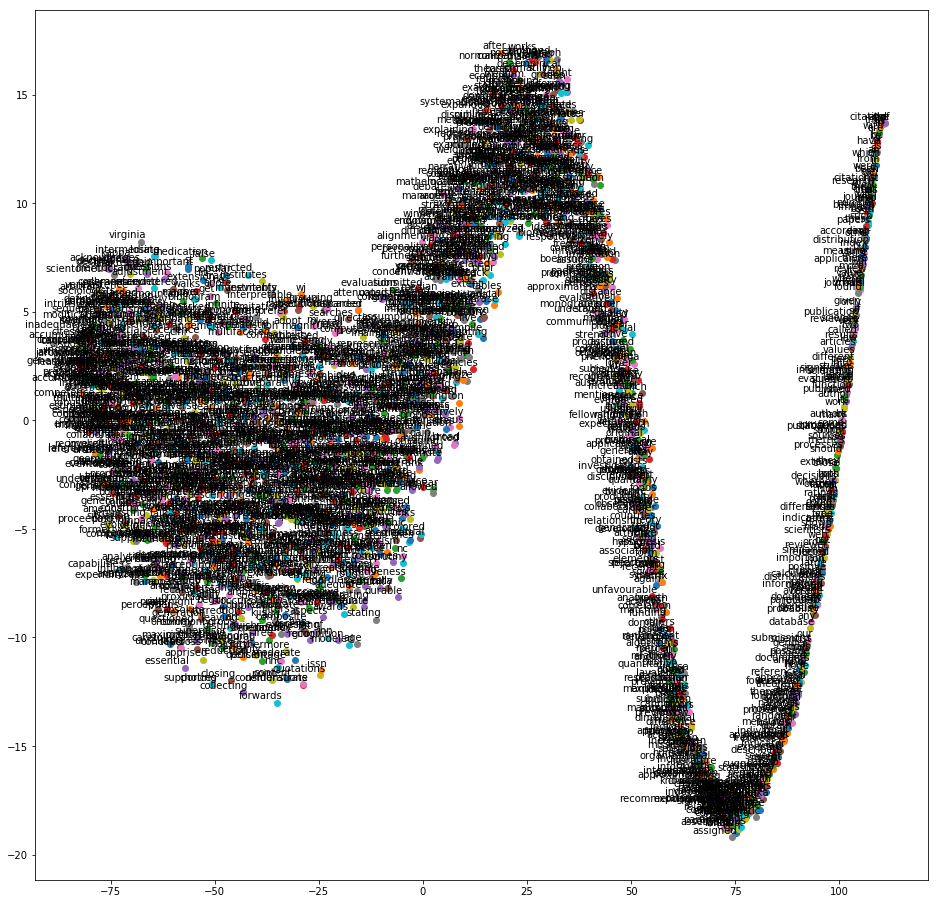

In [100]:
tsne_plot(model)